In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_CF_judgments = pd.read_csv("Turkish_Gezi_protest/CF_aggregate_all_answers_report_22_05_2018.csv")

In [3]:
len(df_CF_judgments)

1440

In [4]:
df_CF_judgments.rename(columns={'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold':'violence',
                         'is_this_tweet_related_to_turkish_protests_2013_gold' : 'protest',
                         'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest':'violence_judgment',
                          'is_this_tweet_related_to_turkish_protests_2013':'protest_judgment'
                         }, inplace =True)

In [5]:
df_CF_judgments.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'violence_judgment', 'protest_judgment',
       'created_at', 'violence', 'id', 'protest', 'proccd_text', 'text'],
      dtype='object')

In [6]:
df_CF_judgments_test_questions = df_CF_judgments[df_CF_judgments['_golden']==True]

In [7]:
len(df_CF_judgments_test_questions)

125

In [8]:
df_CF_judgments_finalized = df_CF_judgments[df_CF_judgments["_golden"] == False]

In [9]:
len(df_CF_judgments_finalized)

1315

In [10]:
df_CF_labels = pd.read_csv("Turkish_Gezi_protest/CF_aggregate_best_answer_22_05_2018.csv")

In [11]:
len(df_CF_labels)

1315

In [12]:
df_CF_labels.rename(columns={'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest':'violence',
                         'is_this_tweet_related_to_turkish_protests_2013' : 'protest',
                         'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest_gold':'violence_judgment',
                          'is_this_tweet_related_to_turkish_protests_2013_gold':'protest_judgment'
                         }, inplace =True)

In [13]:
#merge the finalized judgemnts with labels
df_CF_finalized_judgments_labels = df_CF_judgments_finalized.merge(df_CF_labels,on='_unit_id')

In [14]:
df_CF_finalized_judgments_labels.columns

Index(['_unit_id', '_golden_x', '_unit_state_x', '_trusted_judgments_x',
       '_last_judgment_at_x', 'violence_judgment_x', 'protest_judgment_x',
       'created_at_x', 'violence_x', 'id_x', 'protest_x', 'proccd_text_x',
       'text_x', '_golden_y', '_unit_state_y', '_trusted_judgments_y',
       '_last_judgment_at_y', 'violence_y',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest:confidence',
       'protest_y',
       'is_this_tweet_related_to_turkish_protests_2013:confidence',
       'created_at_y', 'violence_judgment_y', 'id_y', 'protest_judgment_y',
       'proccd_text_y', 'text_y'],
      dtype='object')

In [15]:
df_CF_finalized_judgments_labels = df_CF_finalized_judgments_labels[['_unit_id','_golden_x','_unit_state_x','_trusted_judgments_x','_last_judgment_at_x',
                                                       'violence_judgment_x','violence_y','does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest:confidence',
                                                        'protest_judgment_x', 'protest_y', 'is_this_tweet_related_to_turkish_protests_2013:confidence',
                                                       'created_at_x', 'id_x','proccd_text_x']]

In [16]:
df_CF_test_questions_unique = df_CF_judgments_test_questions.drop_duplicates()

In [17]:
len(df_CF_test_questions_unique)

125

In [18]:
df_CF_test_questions_unique.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'violence_judgment', 'protest_judgment',
       'created_at', 'violence', 'id', 'protest', 'proccd_text', 'text'],
      dtype='object')

In [19]:
print('avf judgment per test question', np.mean(df_CF_test_questions_unique._trusted_judgments))

avf judgment per test question 11.504


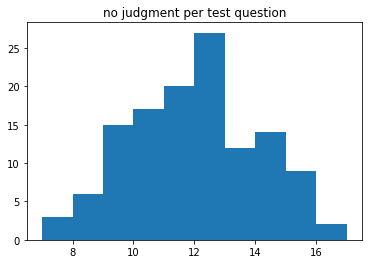

In [20]:
plt.hist(df_CF_test_questions_unique._trusted_judgments)
plt.title('no judgment per test question')
plt.show()

In [21]:
print('avf judgment per finalized question question', np.mean(df_CF_judgments_finalized._trusted_judgments))

avf judgment per finalized question question 3.0


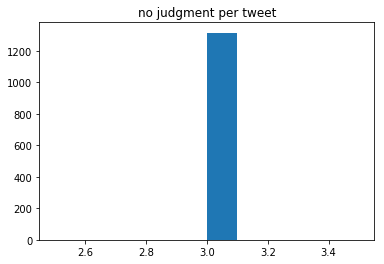

In [22]:
plt.hist(df_CF_judgments_finalized._trusted_judgments)
plt.title('no judgment per tweet')
plt.show()

In [23]:
df_CF_finalized_judgments_labels.columns

Index(['_unit_id', '_golden_x', '_unit_state_x', '_trusted_judgments_x',
       '_last_judgment_at_x', 'violence_judgment_x', 'violence_y',
       'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest:confidence',
       'protest_judgment_x', 'protest_y',
       'is_this_tweet_related_to_turkish_protests_2013:confidence',
       'created_at_x', 'id_x', 'proccd_text_x'],
      dtype='object')

In [24]:
df_CF_finalized_judgments_labels

,_unit_id,_golden_x,_unit_state_x,_trusted_judgments_x,_last_judgment_at_x,violence_judgment_x,violence_y,does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest:confidence,protest_judgment_x,protest_y,is_this_tweet_related_to_turkish_protests_2013:confidence,created_at_x,id_x,proccd_text_x
0,1657977939,False,finalized,3,3/30/2018 15:01:20,NaN,NaN,NaN,0\r0\r0,0,1.0000,Sat Jun 15 12:14:33 +0000 2013,3.458770e+17,lawn goose clothes lot DD outfit pattern sewin...
1,1657977940,False,finalized,3,3/30/2018 15:11:00,0\r1\r0,0.0,0.6606,1\r1\r1,1,1.0000,Tue Jun 04 16:04:35 +0000 2013,3.419490e+17,rt usrId turkish police have blacked out id nu...
2,1657977941,False,finalized,3,3/30/2018 15:05:25,0\r0\r0,0.0,1.0000,1\r1\r1,1,1.0000,Sat Jun 01 07:12:41 +0000 2013,3.407280e+17,rt usrId #occupy #taksim protesters in #istanb...
3,1657977942,False,finalized,3,04/06/18 11:49,1,NaN,0.0000,0\r1\r0,0,0.6767,Sun Jun 09 14:53:50 +0000 2013,3.437430e+17,rt usrId usrId erdogan says vandals entering m...
4,1657977943,False,finalized,3,3/30/2018 15:33:35,NaN,NaN,NaN,0\r0\r0,0,1.0000,Sat Jun 01 22:08:17 +0000 2013,3.409530e+17,photoset forest dreams turkey needs support as...
5,1657977944,False,finalized,3,04/06/18 14:35,0\r0,0.0,0.6590,1\r1\r0,1,0.6590,Sat Jun 01 19:58:31 +0000 2013,3.409200e+17,rt usrId protesters set up barricades to halt ...
6,1657977945,False,finalized,3,04/06/18 12:19,NaN,NaN,NaN,0\r0\r0,0,1.0000,Mon Jun 03 22:57:24 +0000 2013,3.416900e+17,rt usrId httpAddress httpAddress httpAddress h...
7,1657977946,False,finalized,3,3/30/2018 15:01:20,0\r0,0.0,0.6515,1\r0\r1,1,0.6515,Mon Jun 03 19:19:02 +0000 2013,3.416350e+17,rt usrId moroccans protesting erdogan s visit ...
8,1657977947,False,finalized,3,3/30/2018 15:09:17,0\r0\r0,0.0,1.0000,1\r1\r1,1,1.0000,Thu Jun 13 13:27:20 +0000 2013,3.451710e+17,taksim square and gezi park protests designing...
9,1657977948,False,finalized,3,3/30/2018 15:31:17,0\r0\r0,0.0,1.0000,1\r1\r1,1,1.0000,Wed Jun 05 17:39:21 +0000 2013,3.423350e+17,rt usrId investors baffled by turkey protests ...


In [25]:
df_CF_finalized_judgments_labels.rename(columns={'violence_y':'violence',
                         'protest_y' : 'protest',
                          'does_this_tweet_reportdiscuss_violent_incidents_happened_during_the_protest:confidence': 'violence_confidence',
                           'is_this_tweet_related_to_turkish_protests_2013:confidence':'protest_confidence',
                             'violence_judgment_x':'violence_judgment',
                              '_trusted_judgments_x':'_trusted_judgments',
                               '_golden_x':'_golden',
                                'created_at_x':'created_at',
                                 'id_x':'id',
                                  'proccd_text_x':'proccd_text',
                                   'text_x':'text'         
                                           },inplace =True)

In [26]:
df_CF_finalized_judgments_labels[df_CF_finalized_judgments_labels['violence'] == 1]

,_unit_id,_golden,_unit_state_x,_trusted_judgments,_last_judgment_at_x,violence_judgment,violence,violence_confidence,protest_judgment_x,protest,protest_confidence,created_at,id,proccd_text
11,1657977950,False,finalized,3,3/30/2018 15:29:27,1\r1,1.0,0.6612,1\r0\r1,1,0.6612,Mon Jun 10 03:49:59 +0000 2013,3.439380e+17,turkey police crush protests in ankara istanbu...
14,1657977954,False,finalized,3,3/30/2018 15:00:58,1\r1\r0,1.0,0.6769,1\r1\r1,1,1.0000,Wed Jun 12 23:29:49 +0000 2013,3.449600e+17,rt usrId police detaining protestors in #diren...
16,1657977956,False,finalized,3,04/05/18 11:50,1\r1,1.0,0.6250,1\r0\r1,1,0.6250,Sun Jun 16 11:41:34 +0000 2013,3.462310e+17,cbs riot police rush to crush renewed turkey p...
25,1657977970,False,finalized,3,04/05/18 11:50,1\r1\r0,1.0,0.6875,1\r1\r1,1,1.0000,Fri May 31 14:35:57 +0000 2013,3.404770e+17,protesters blocking bulldozers tear gassed in ...
43,1657977991,False,finalized,3,04/06/18 11:43,1\r0,1.0,0.3412,1\r1\r0,1,0.6645,Tue Jun 11 18:30:17 +0000 2013,3.445220e+17,rt usrId i think this is the last pic i manage...
49,1657977998,False,finalized,3,04/05/18 11:50,0\r1,1.0,0.3125,1\r0\r1,1,0.6250,Sun Jun 16 19:34:30 +0000 2013,3.463500e+17,rt usrId #istanbul #protestors holding their g...
58,1657978009,False,finalized,3,3/30/2018 15:09:17,1\r1\r0,1.0,0.6581,1\r1\r1,1,1.0000,Sun Jun 16 10:41:39 +0000 2013,3.462160e+17,rt usrId police detaining the doctors at ramad...
60,1657978012,False,finalized,3,3/30/2018 15:02:31,1\r1\r1,1.0,1.0000,1\r1\r1,1,1.0000,Wed Jun 12 18:49:45 +0000 2013,3.448890e+17,usrId riot police fire water cannon at protest...
63,1657978015,False,finalized,3,3/30/2018 15:04:47,0\r1\r1,1.0,0.6594,1\r1\r1,1,1.0000,Mon Jun 03 17:58:30 +0000 2013,3.416150e+17,rt usrId police chopper circling over crowd of...
94,1657978052,False,finalized,3,3/30/2018 15:29:27,1\r0,1.0,0.3388,0\r1\r1,1,0.6748,Mon Jun 24 10:27:31 +0000 2013,3.491120e+17,rt usrId #simsek says some journalists killed ...


In [27]:
print('avg user confidence level for protest finalized question', np.mean(
    df_CF_finalized_judgments_labels['protest_confidence'])) 

avg user confidence level for protest finalized question 0.9134655513307983


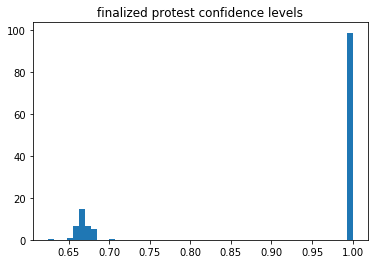

In [28]:
plt.hist(df_CF_finalized_judgments_labels['protest_confidence'],50, density=1)
plt.title('finalized protest confidence levels')
plt.show()

In [29]:
print('avg user confidence level for violence finalized question', np.mean(
    df_CF_finalized_judgments_labels['violence_confidence'].dropna())) 

avg user confidence level for violence finalized question 0.643910259579728


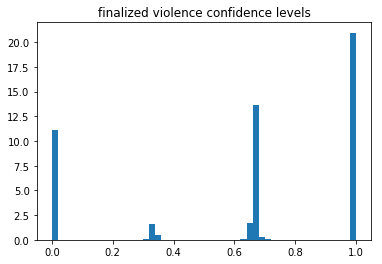

In [30]:
x = df_CF_finalized_judgments_labels['violence_confidence'].dropna()
plt.hist(x,50, density=1)
plt.title('finalized violence confidence levels')
plt.show()

In [31]:
df_CF_finalized_judgments_labels.columns

Index(['_unit_id', '_golden', '_unit_state_x', '_trusted_judgments',
       '_last_judgment_at_x', 'violence_judgment', 'violence',
       'violence_confidence', 'protest_judgment_x', 'protest',
       'protest_confidence', 'created_at', 'id', 'proccd_text'],
      dtype='object')

In [32]:
df_CF_finalized_judgments_labels['violence_judgment'] = df_CF_finalized_judgments_labels['violence_judgment'].dropna().apply(lambda x : x.replace('\r',''))

In [33]:
df_CF_finalized_judgments_labels['protest_judgment_x']

0       0\r0\r0
1       1\r1\r1
2       1\r1\r1
3       0\r1\r0
4       0\r0\r0
5       1\r1\r0
6       0\r0\r0
7       1\r0\r1
8       1\r1\r1
9       1\r1\r1
10      1\r1\r1
11      1\r0\r1
12      0\r0\r0
13      0\r0\r0
14      1\r1\r1
15      0\r0\r0
16      1\r0\r1
17      1\r1\r1
18      0\r1\r1
19      1\r0\r0
20      1\r1\r1
21      0\r0\r0
22      0\r0\r0
23      1\r1\r0
24      1\r0\r0
25      1\r1\r1
26      1\r1\r1
27      0\r0\r1
28      0\r0\r1
29      0\r1\r0
         ...   
1285    1\r0\r1
1286    1\r1\r1
1287    1\r1\r0
1288    1\r1\r0
1289    1\r1\r1
1290    1\r1\r1
1291    0\r0\r1
1292    0\r0\r0
1293    0\r0\r0
1294    0\r0\r0
1295    1\r1\r1
1296    1\r0\r1
1297    1\r1\r1
1298    0\r0\r0
1299    1\r1\r1
1300    0\r0\r0
1301    1\r1\r1
1302    1\r1\r0
1303    1\r1\r1
1304    0\r0\r0
1305    1\r1\r1
1306    0\r0\r0
1307    0\r0\r0
1308    0\r0\r0
1309    0\r0\r0
1310    1\r1\r1
1311    0\r0\r1
1312    1\r0\r0
1313    0\r0\r1
1314    0\r1\r1
Name: protest_judgment_x

In [34]:
df_CF_finalized_judgments_labels['protest_judgment_x'] = df_CF_finalized_judgments_labels['protest_judgment_x'].apply(lambda x : x.replace('\r',''))

In [35]:
df_CF_finalized_judgments_labels['protest_judgment_x'] = df_CF_finalized_judgments_labels['protest_judgment_x'].apply('"{}"'.format)

In [36]:
df_CF_finalized_judgments_labels['violence_judgment'] = df_CF_finalized_judgments_labels['violence_judgment'].apply('"{}"'.format)

In [37]:
len(df_CF_finalized_judgments_labels)

1315

In [38]:
df_CF_finalized_judgments_labels['protest_judgment_x']

0       "000"
1       "111"
2       "111"
3       "010"
4       "000"
5       "110"
6       "000"
7       "101"
8       "111"
9       "111"
10      "111"
11      "101"
12      "000"
13      "000"
14      "111"
15      "000"
16      "101"
17      "111"
18      "011"
19      "100"
20      "111"
21      "000"
22      "000"
23      "110"
24      "100"
25      "111"
26      "111"
27      "001"
28      "001"
29      "010"
        ...  
1285    "101"
1286    "111"
1287    "110"
1288    "110"
1289    "111"
1290    "111"
1291    "001"
1292    "000"
1293    "000"
1294    "000"
1295    "111"
1296    "101"
1297    "111"
1298    "000"
1299    "111"
1300    "000"
1301    "111"
1302    "110"
1303    "111"
1304    "000"
1305    "111"
1306    "000"
1307    "000"
1308    "000"
1309    "000"
1310    "111"
1311    "001"
1312    "100"
1313    "001"
1314    "011"
Name: protest_judgment_x, Length: 1315, dtype: object

In [39]:
df_CF_finalized_judgments_labels.to_csv("Turkish_Gezi_protest/CF_label_confidence_judgments_finalized_22_05_2018.csv",
                                        sep=',')

In [40]:
len(pd.read_csv("Turkish_Gezi_protest/CF_label_confidence_judgments_finalized_22_05_2018.csv"))

1315